# AI-Powered Brain Tumor Classification: Revolutionizing MRI Diagnostics with Deep Learning  

This notebook showcases the transformative potential of **Artificial Intelligence (AI)** and **Deep Learning** in medical imaging, specifically for the **detection and classification of brain tumors** from MRI scans. By leveraging **Convolutional Neural Networks (CNNs)** and **Transfer Learning (TL)**, we aim to provide a **highly accurate, scalable, and automated diagnostic solution** for healthcare professionals.  

## Context  
Brain tumors rank among the most aggressive and complex medical conditions, posing significant diagnostic challenges due to their variability in size, shape, and location. Traditional manual analysis of MRI scans is often time-consuming, error-prone, and dependent on access to highly skilled radiologists and neurosurgeons—resources that are scarce in many regions.  
This notebook tackles these issues by introducing a **state-of-the-art AI-based solution** that not only improves diagnostic accuracy but also ensures faster analysis, empowering medical professionals worldwide to deliver better patient outcomes.  

## Objectives  
- **Classify brain tumors** into four distinct categories with precision using CNNs and Transfer Learning.  
- **Overcome diagnostic challenges** by addressing the variability and complexity of brain tumor characteristics.  
- **Lay the groundwork** for a cloud-enabled automated diagnostic system, accessible to healthcare providers globally.  

## Key Features  
- **Dataset**: A carefully curated MRI dataset for brain tumor classification, with acknowledgments to contributors **Navoneel Chakrabarty** and **Swati Kanchan**.  
- **Technology**: Advanced deep learning methodologies, including CNNs and Transfer Learning, to achieve superior classification accuracy.  
- **Impact**: Development of a reliable, efficient AI model to assist medical professionals in diagnosing brain tumors quickly and accurately.  

## Team Acknowledgments  
This initiative draws inspiration from the contributions of:  
- **Sartaj Bhuvaji**  
- **Ankita Kadam**  
- **Prajakta Bhumkar**  
- **Sameer Dedge**  

We also extend our gratitude to the **open-source community** for providing the tools, datasets, and collaborative spirit necessary to advance AI applications in healthcare.  

---  

By harnessing cutting-edge AI technologies, this notebook aims to revolutionize MRI analysis, enabling faster, more reliable diagnostic workflows and ultimately improving care for patients affected by brain tumors.


## Libraries and Tools Used  

In building this project, we relied on a diverse set of Python libraries and tools that form the backbone of the deep learning pipeline. Each library plays a crucial role, from handling data and preprocessing images to designing, training, and evaluating the model. The thoughtful integration of these tools ensures a streamlined and efficient workflow, enabling us to focus on solving the challenges of brain tumor classification.  

Below is an overview of the key libraries and modules used in this project, along with their specific purposes:  

- **`matplotlib.pyplot`**: For creating visualizations that help analyze data patterns and display model performance metrics.  
- **`numpy`**: A foundation for numerical operations, offering efficient handling of arrays and mathematical computations.  
- **`pandas`**: Simplifies data manipulation and analysis, providing tabular structures to organize and process data.  
- **`seaborn`**: Enhances data visualization with user-friendly functions for statistical plotting, complementing Matplotlib.  
- **`cv2` (OpenCV)**: A robust library for image processing, crucial for resizing and augmenting MRI images for training.  
- **`tensorflow`**: The core framework for building, training, and fine-tuning the Convolutional Neural Network (CNN) model.  
- **`ImageDataGenerator`**: Facilitates image augmentation, improving the model’s ability to generalize across unseen data.  
- **`tqdm`**: Adds progress bars to loops, making the workflow more user-friendly and transparent.  
- **`os`**: Enables interaction with the file system for managing directories and dataset organization.  
- **`sklearn` (scikit-learn)**: Provides essential tools for data splitting, shuffling, and performance evaluation metrics.  
- **`EfficientNetB0`**: A pre-trained deep learning model used for Transfer Learning, significantly reducing training time.  
- **`EarlyStopping`, `ReduceLROnPlateau`, `TensorBoard`, `ModelCheckpoint`**: TensorFlow callbacks that optimize training, monitor progress, and prevent overfitting.  
- **`classification_report`, `confusion_matrix`**: Evaluation utilities for generating detailed performance metrics and visualizing model predictions.  
- **`ipywidgets`**: Adds interactivity within the Jupyter notebook environment, improving user engagement.  
- **`io` and `PIL.Image`**: Handle image input and processing tasks effectively.  
- **`IPython.display`**: Supports dynamic outputs like images and widgets for a more interactive notebook experience.  
- **`warnings`**: Ensures a clean workflow by suppressing unnecessary warnings during execution.  

By combining these tools, this project achieves an efficient and reproducible process for image classification, from data preparation to model evaluation. This foundation not only simplifies development but also ensures that the solutions are scalable and robust for real-world applications.


In [ ]:
!pip install imagehash Pillow tqdm --quiet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
import random
import imagehash

## Exploring and Extracting Dataset Files  

To work with the dataset, the first step is to ensure that the data files are accessible. The following code iterates through the directory structure to list all the files contained within a specified archive. Additionally, if the dataset is provided in a compressed format, such as `.zip`, it will be extracted automatically for easier access.  

### Key Steps:  
1. **Check and Extract**: If the dataset is provided as a compressed file (`brain_tumor_dataset.zip`), the script will extract it into the working directory using the `zipfile` module.  
2. **List Files**: The `os.walk()` function is then used to traverse the directory structure, printing the full path of each file for verification.

In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set paths to datasets inside Google Drive
# Sey these paths to match where zips are located in Drive
original_zip = "/content/drive/MyDrive/original_dataset.zip"
new_zip = "/content/drive/MyDrive/new_dataset.zip"

# Extract zips into folders in Colab runtime
import zipfile

def extract_zip(zip_path, extract_to):
    print(f"Extracting {zip_path} ...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Done extracting {zip_path} into {extract_to}/")

# Extract datasets
extract_zip(original_zip, "/content/original_dataset")
extract_zip(new_zip, "/content/new_dataset")

# Walk through extracted directories and list files
for dirname, _, filenames in os.walk('/content/original_dataset'):
    for filename in filenames[:5]:  # show only first 5 files
        print("Original:", os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/content/new_dataset'):
    for filename in filenames[:5]:  # show only first 5 files
        print("New:", os.path.join(dirname, filename))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracting /content/drive/MyDrive/original_dataset.zip ...
Done extracting /content/drive/MyDrive/original_dataset.zip into /content/original_dataset/
Extracting /content/drive/MyDrive/new_dataset.zip ...
Done extracting /content/drive/MyDrive/new_dataset.zip into /content/new_dataset/
Original: /content/original_dataset/__MACOSX/._original_dataset
Original: /content/original_dataset/__MACOSX/original_dataset/._Training
Original: /content/original_dataset/__MACOSX/original_dataset/._Testing
Original: /content/original_dataset/__MACOSX/original_dataset/Training/._no_tumor
Original: /content/original_dataset/__MACOSX/original_dataset/Training/._glioma_tumor
Original: /content/original_dataset/__MACOSX/original_dataset/Training/._meningioma_tumor
Original: /content/original_dataset/__MACOSX/original_dataset/Training/._pituitary_tumor
Original: /content/original_

* **zipfile.ZipFile:** This module is used to handle .zip files. The script checks if the specified file is a valid zip archive and extracts its contents if needed.
* **os.walk():** Recursively walks through the directory and subdirectories, providing access to directory names and filenames.
* **Dynamic Extraction:** Automatically extracts the archive if it hasn't been done previously, ensuring that the dataset is ready for use.
This approach ensures that the dataset is both unpacked (if compressed) and verified, providing a clear list of available files for subsequent processing.

## Custom Color Palettes  

This project incorporates custom color palettes to enhance the visual appeal and consistency of data visualizations. These palettes are designed with specific hex color codes and cater to different thematic purposes:  

- **Dark Palette**: A sophisticated mix of charcoal, slate, and deep gray tones, perfect for creating modern and minimalist visuals.  
  - Example: `#1E1E2C`, `#2E3440`, `#4C566A`, `#D8DEE9`  
- **Blue Palette**: A gradient of calming blues, ideal for denoting stability, trust, or information.  
  - Example: `#1B3A4B`, `#28587B`, `#BFD7EA`, `#F7FBFC`  
- **Orange Palette**: A vibrant selection of orange shades, useful for drawing attention to key insights or creating a warm, energetic theme.  
  - Example: `#D35400`, `#E67E22`, `#F39C12`, `#FDEBD0`  

### Purpose and Visualization  
These custom palettes are carefully curated to ensure they not only improve the visual quality of charts but also enhance the interpretability of data. By previewing them in the context of specific visualizations, we can ensure they align with the project's tone and objectives.  

### Benefits  
1. **Consistency**: A cohesive color scheme maintains a professional and polished appearance across all visualizations.  
2. **Clarity**: Well-chosen colors improve the readability of charts and graphs, ensuring that data insights are clear and impactful.  
3. **Customizability**: Hex codes provide precise control, allowing the color scheme to be adapted to the project's unique requirements.  

With these palettes, we aim to strike a balance between aesthetics and functionality, ensuring that the visualizations are both appealing and effective in conveying insights.


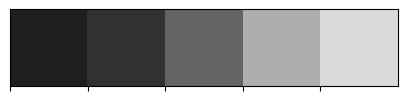

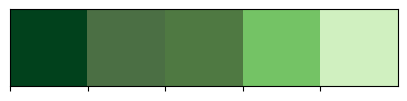

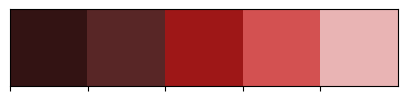

In [ ]:
# Define color palettes
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C', '#4B6F44', '#4F7942', '#74C365', '#D0F0C0']

# Visualize palettes
sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

## Image Loading and Preprocessing  

In this section, the images are loaded from different directories, resized, and organized into training data arrays for model training. **The dataset is divided into different categories, such as glioma tumors, meningioma tumors, pituitary tumors, and no tumor.**

### Process Overview:
1. **Image Loading**:
   - The images are stored in directories representing different tumor categories (e.g., 'glioma_tumor', 'no_tumor', etc.). Each directory contains images of the corresponding category.
   - We use the **OpenCV** library to read the images from these directories.

2. **Resizing**:
   - Each image is resized to a consistent size (150x150 pixels) to ensure uniformity across the dataset, making it suitable for deep learning model training.

3. **Data Organization**:
   - As the images are loaded and resized, they are appended to a list (`X_train`), which will hold the input images for the model.
   - The corresponding labels for each image (e.g., 'glioma_tumor', 'no_tumor') are stored in another list (`y_train`) to serve as the target output during model training.

4. **Conversion to Numpy Arrays**:
   - After the images and labels are collected, they are converted into **NumPy arrays**. This format is efficient for processing by deep learning models, which require data in a numerical format.


In [ ]:
import os
import cv2
import numpy as np
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# Define labels and image size
labels = ['glioma_tumor', 'no_tumor', 'meningioma_tumor', 'pituitary_tumor']
image_size = 150

# Noise functions
def add_gaussian_noise(image, mean=0, sigma=25):
    gauss = np.random.normal(mean, sigma, image.shape).astype('float32')
    noisy = np.clip(image.astype('float32') + gauss, 0, 255)
    return noisy.astype('uint8')

def add_salt_and_pepper_noise(image, prob=0.02):
    noisy = np.copy(image)
    black = 0
    white = 255
    probs = np.random.rand(*image.shape[:2])
    noisy[probs < (prob / 2)] = black
    noisy[probs > 1 - (prob / 2)] = white
    return noisy

'''
def random_gaussian(img):
    sigma = np.random.uniform(5, 50)
    return add_gaussian_noise(img, sigma=sigma)

def random_salt_pepper(img):
    prob = np.random.uniform(0.005, 0.05)
    return add_salt_and_pepper_noise(img, prob=prob)
'''

def add_speckle_noise(image, sigma=0.1):
    # Common in medical or radar images, adds “grainy” distortion
    noise = np.random.randn(*image.shape) * sigma
    noisy = image + image * noise
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)

'''
def add_poisson_noise(image):
    # Simulates sensor noise, intensity depends on pixel brightness
    vals = len(np.unique(image))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.random.poisson(image * vals) / float(vals)
    noisy = np.clip(noisy, 0, 255)
    return noisy.astype(np.uint8)
'''

noise_functions = [
    lambda img: add_gaussian_noise(img, sigma=np.random.uniform(5, 50)),
    lambda img: add_salt_and_pepper_noise(img, prob=np.random.uniform(0.005, 0.05)),
    add_speckle_noise
]

def load_images_from_directory(directory, label_list, image_size):
    images, labels_out = [], []
    for label in label_list:
        folder_path = os.path.join(directory, label)
        if not os.path.exists(folder_path):
            print(f"⚠️ Skipping missing folder: {folder_path}")
            continue

        for file_name in tqdm(os.listdir(folder_path), desc=f"Loading {label} from {os.path.basename(directory)}"):
            file_path = os.path.join(folder_path, file_name)
            img = cv2.imread(file_path)
            if img is None:
                continue
            img = cv2.resize(img, (image_size, image_size))
            images.append(img)
            labels_out.append(label)
    return images, labels_out

# Load all original and new sets
orig_train_dir = "/content/original_dataset/original_dataset/Training"
orig_test_dir = "/content/original_dataset/original_dataset/Testing"
new_train_dir = "/content/new_dataset/new_dataset/Training"
new_test_dir = "/content/new_dataset/new_dataset/Testing"

X_train_orig, y_train_orig = load_images_from_directory(orig_train_dir, labels, image_size)
X_test_orig, y_test_orig = load_images_from_directory(orig_test_dir, labels, image_size)
X_train_new, y_train_new = load_images_from_directory(new_train_dir, labels, image_size)
X_test_new, y_test_new = load_images_from_directory(new_test_dir, labels, image_size)

X_all = np.array(X_train_orig + X_test_orig + X_train_new + X_test_new)
y_all = np.array(y_train_orig + y_test_orig + y_train_new + y_test_new)

print(f"Combined dataset size: {len(X_all)} images")

def remove_near_duplicates_fast(X, y, hash_size=8, threshold=10):
    """
    Removes near-duplicate images using perceptual hashing.
    - hash_size: size of the perceptual hash (larger = more precise)
    - threshold: max Hamming distance between hashes to be considered a duplicate
    """
    print("🧹 Removing near-duplicates with perceptual hashing...")
    seen_hashes = []
    unique_images, unique_labels = [], []

    for i in tqdm(range(len(X)), desc="Hashing images"):
        # Convert to PIL Image and compute perceptual hash
        img = Image.fromarray(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
        h = imagehash.phash(img, hash_size=hash_size)

        # Check if this hash is already close to one we've seen
        duplicate_found = False
        for existing_hash in seen_hashes:
            if abs(h - existing_hash) <= threshold:
                duplicate_found = True
                break

        if not duplicate_found:
            seen_hashes.append(h)
            unique_images.append(X[i])
            unique_labels.append(y[i])

    print(f"✅ Reduced from {len(X)} → {len(unique_images)} unique images.")
    return np.array(unique_images), np.array(unique_labels)

X_unique, y_unique = remove_near_duplicates_fast(X_all, y_all)

X_train, X_test, y_train, y_test = train_test_split(
    X_unique, y_unique, test_size=0.15, stratify=y_unique, random_state=42
)

print(f"Train: {len(X_train)}, Test: {len(X_test)}")

print("🎨 Adding random noise to training images...")
for i in tqdm(range(len(X_train))):
    noise_func = random.choice(noise_functions)
    X_train[i] = noise_func(X_train[i])

print("✅ Noise added to training images only.")

print(f"Final shapes -> Train: {X_train.shape}, Test: {X_test.shape}")

'''
def add_uniform_noise(image, low=-25, high=25):
    # Adds evenly distributed random variation
    noise = np.random.uniform(low, high, image.shape)
    noisy = np.clip(image.astype('float32') + noise, 0, 255)
    return noisy.astype('uint8')

def load_images_from_directory(directory, label_list, image_size, apply_noise=False):
    images = []
    labels_out = []

    # Define available noise functions
    noise_functions = [
        random_gaussian,
        random_salt_pepper,
        add_speckle_noise,
        add_poisson_noise,
        add_uniform_noise
    ]

    for label in label_list:
        folder_path = os.path.join(directory, label)
        if not os.path.exists(folder_path):
            print(f"⚠️ Skipping missing folder: {folder_path}")
            continue

        for file_name in tqdm(os.listdir(folder_path), desc=f"Loading {label} images from {os.path.basename(directory)}"):
            try:
                file_path = os.path.join(folder_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    img = cv2.resize(img, (image_size, image_size))

                    # Randomly apply one noise type if requested
                    if apply_noise:
                        noise_func = random.choice(noise_functions)
                        img = noise_func(img)

                    images.append(img)
                    labels_out.append(label)

            except Exception as e:
                print(f"Error loading {file_name}: {e}")

    return images, labels_out


# === Load ORIGINAL dataset ===
orig_train_dir = "/content/original_dataset/original_dataset/Training"
orig_test_dir = "/content/original_dataset/original_dataset/Testing"

X_train_orig, y_train_orig = load_images_from_directory(orig_train_dir, labels, image_size, apply_noise=False)
X_test_orig, y_test_orig = load_images_from_directory(orig_test_dir, labels, image_size, apply_noise=False)


# === Load NEW dataset (with noise) ===
new_train_dir = "/content/new_dataset/new_dataset/Training"
new_test_dir = "/content/new_dataset/new_dataset/Testing"

X_train_new, y_train_new = load_images_from_directory(new_train_dir, labels, image_size, apply_noise=True)
X_test_new, y_test_new = load_images_from_directory(new_test_dir, labels, image_size, apply_noise=False)


# === Combine datasets ===
X_train = np.array(X_train_orig + X_train_new)
y_train = np.array(y_train_orig + y_train_new)

X_test = np.array(X_test_orig + X_test_new)
y_test = np.array(y_test_orig + y_test_new)

print(f"Final Train images: {X_train.shape}, Train labels: {y_train.shape}")
print(f"Final Test images: {X_test.shape}, Test labels: {y_test.shape}")
'''

Loading pituitary_tumor from Testing: 100%|██████████| 300/300 [00:00<00:00, 831.64it/s]


Combined dataset size: 10287 images
🧹 Removing near-duplicates with perceptual hashing...


Hashing images: 100%|██████████| 10287/10287 [00:39<00:00, 257.89it/s]


✅ Reduced from 10287 → 2349 unique images.
Train: 1996, Test: 353
🎨 Adding random noise to training images...


100%|██████████| 1996/1996 [00:03<00:00, 565.62it/s]

✅ Noise added to training images only.
Final shapes -> Train: (1996, 150, 150, 3), Test: (353, 150, 150, 3)


'\ndef add_uniform_noise(image, low=-25, high=25):\n    # Adds evenly distributed random variation\n    noise = np.random.uniform(low, high, image.shape)\n    noisy = np.clip(image.astype(\'float32\') + noise, 0, 255)\n    return noisy.astype(\'uint8\')\n\ndef load_images_from_directory(directory, label_list, image_size, apply_noise=False):\n    images = []\n    labels_out = []\n\n    # Define available noise functions\n    noise_functions = [\n        random_gaussian,\n        random_salt_pepper,\n        add_speckle_noise,\n        add_poisson_noise,\n        add_uniform_noise\n    ]\n\n    for label in label_list:\n        folder_path = os.path.join(directory, label)\n        if not os.path.exists(folder_path):\n            print(f"⚠️ Skipping missing folder: {folder_path}")\n            continue\n\n        for file_name in tqdm(os.listdir(folder_path), desc=f"Loading {label} images from {os.path.basename(directory)}"):\n            try:\n                file_path = os.path.join(fol

This data preprocessing step ensures that the images are in a uniform size and organized with corresponding labels, making it ready for training a machine learning model. The model will learn to associate the image features with the correct tumor classification labels.

- The process is repeated for both **training** and **testing** datasets, ensuring the model is trained on a diverse set of images while being tested on another set to evaluate its performance.

## Visualizing Sample Images  

Visualizing sample images from each class is an essential step to gain an intuitive understanding of the dataset. This process helps in verifying the correctness of the dataset labels and understanding the visual differences between classes.

### Purpose of Visualization:
1. **Dataset Familiarization**:  
   Observing sample images allows you to better understand the nature of the data, its structure, and any potential challenges, such as overlapping features between classes or variations in image quality.

2. **Label Verification**:  
   Visualizing examples from each class helps confirm that the data is correctly labeled, ensuring that the training process is not compromised by mislabeled samples.

3. **Quality Assessment**:  
   By looking at the images, you can identify issues such as noise, resolution inconsistencies, or irrelevant data that might affect model performance.




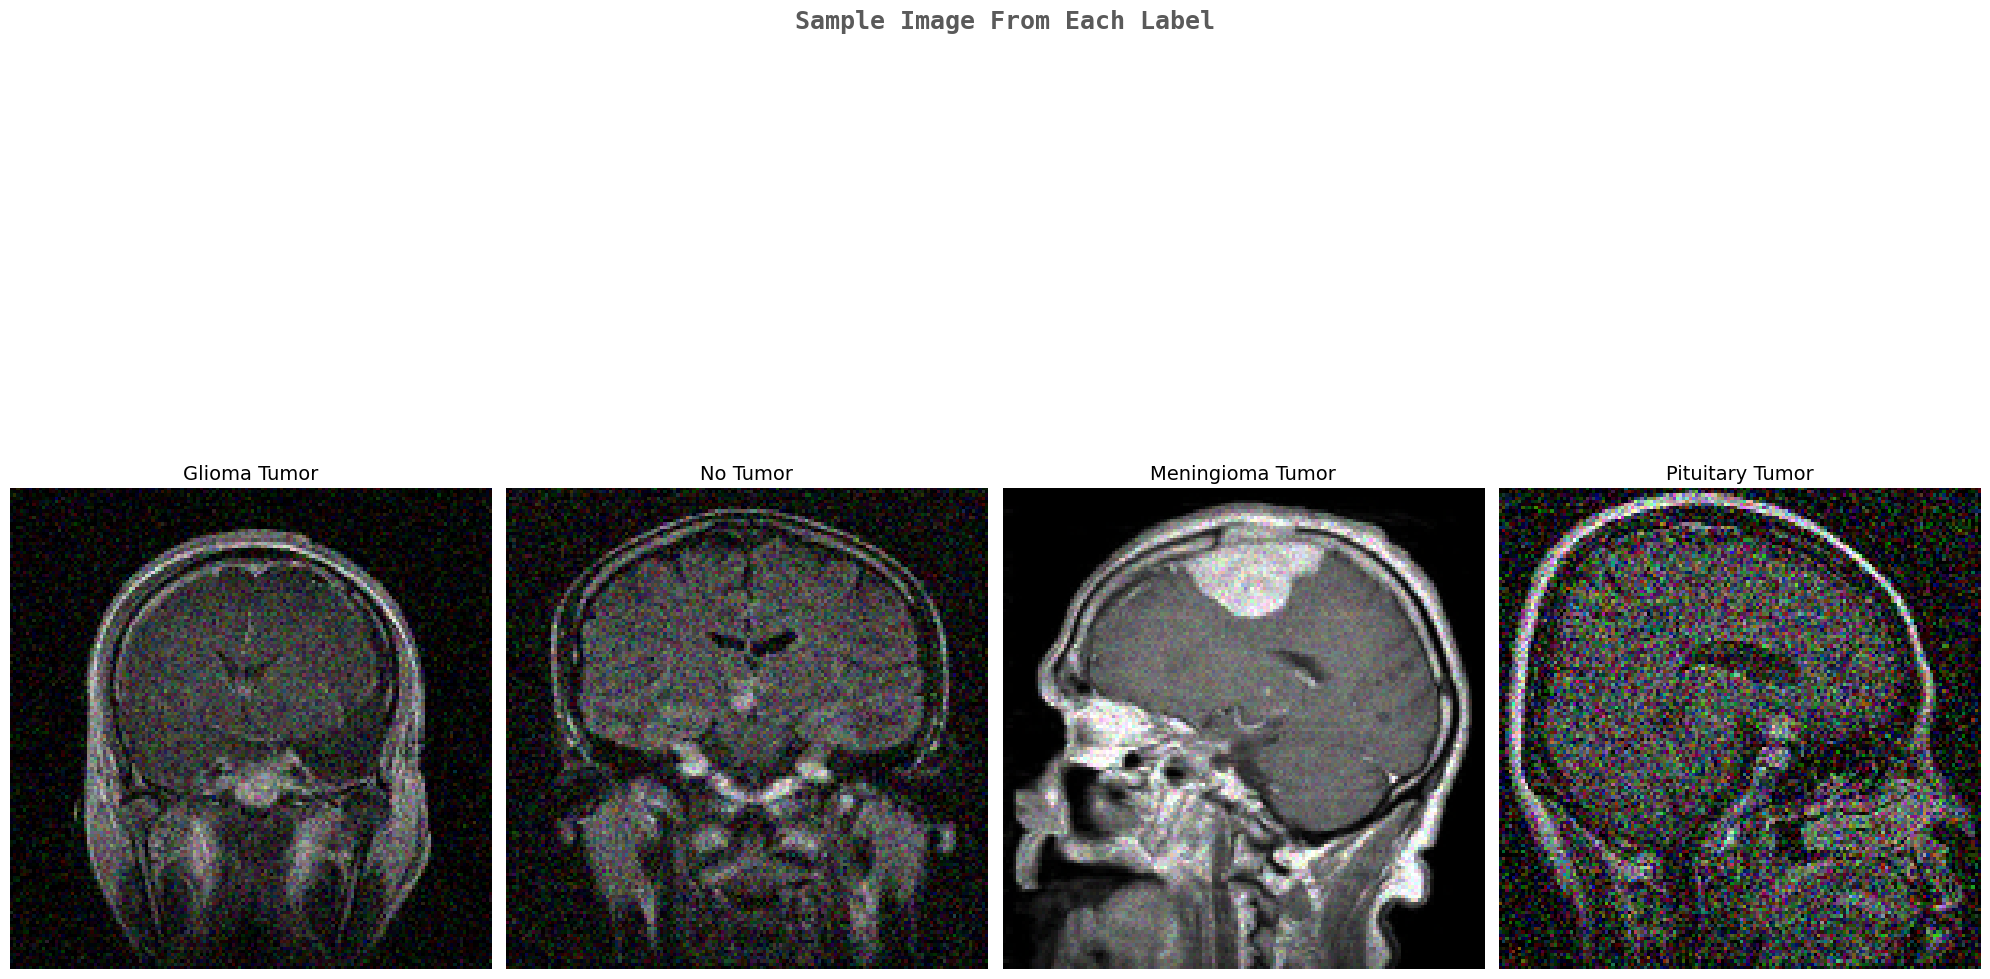

In [ ]:
# Display a sample image from each label
fig, axes = plt.subplots(1, len(labels), figsize=(20, 20))  # Adjust layout based on the number of labels
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold',
         fontname='monospace', color=colors_dark[1], y=0.85, x=0.4, alpha=0.8)

# Loop through each label to find and display the first matching sample
for k, label in enumerate(labels):
    # Find the index of the first image with the current label
    try:
        idx = np.where(y_train == label)[0][0]
        axes[k].imshow(X_train[idx])
        axes[k].set_title(label.replace('_', ' ').title(), fontsize=14)
        axes[k].axis('off')
    except IndexError:
        print(f"No image found for label: {label}")
        axes[k].axis('off')
        axes[k].set_title(f"{label} (Not Found)", fontsize=14, color='red')

plt.tight_layout()
plt.show()


Images from the training dataset are selected for visualization, ensuring representation from each class. Each image is displayed alongside its corresponding label. This provides a quick overview of the dataset distribution and class distinctions.

- Helps identify potential biases or imbalances in the dataset.
- Provides an early indication of whether pre-processing steps (like resizing or normalization) have been applied correctly.
- Assists in understanding the visual complexity of the problem, aiding in model architecture decisions.

By analyzing sample images, you can ensure that the dataset is well-prepared for training and aligns with the expectations of the problem domain.

## Shuffling the Training Data  

Before training a model, **it is essential to shuffle the dataset to ensure that the model is not biased by the order** in which the data is presented. Shuffling the data helps in improving the generalization of the model.

### Process Overview:
- **Shuffling the Data**:  
   The `shuffle()` function is used to randomly reorder the images and their corresponding labels (`X_train` and `y_train`). This randomization helps prevent the model from learning any unintended patterns that may exist due to the order in which the images are loaded.

- **Random Seed**:  
   The `random_state=101` ensures that the shuffling process is reproducible. By setting a fixed seed, we ensure that the same random order is applied every time the code is executed, making the experiment results consistent.


In [ ]:
# Shuffle the training data to ensure randomness and prevent order bias
X_train, y_train = shuffle(X_train, y_train, random_state=101)

# Confirm the shuffling process
print("Data has been shuffled. First 5 labels after shuffling:")
print(y_train[:5])  # Display the first 5 shuffled labels for verification

Data has been shuffled. First 5 labels after shuffling:
['glioma_tumor' 'meningioma_tumor' 'meningioma_tumor' 'pituitary_tumor'
 'meningioma_tumor']


Shuffling the data improves the training process by ensuring that the model does not memorize specific order patterns but instead learns from the overall distribution of the data. This contributes to better model performance and generalization.

In [ ]:
X_train.shape

(1996, 150, 150, 3)

## Splitting the Dataset into Training and Testing Sets  

To evaluate the model's performance effectively, the dataset is split into two subsets: one for training the model and the other for testing its accuracy. This division helps ensure that the model is capable of generalizing to new, unseen data.

### Process Overview:
- **Splitting the Data**:  
   The `train_test_split()` function is used to randomly divide the dataset into two sets: `X_train` and `y_train` for training, and `X_test` and `y_test` for testing. The function takes care of partitioning both the features (images) and labels (tumor classifications).
   
- **Test Size**:  
   The `test_size=0.1` parameter specifies that 10% of the data will be reserved for testing, while the remaining 90% will be used for training the model. This ensures the model has enough data to learn from, while also having a separate subset for evaluation.

- **Random Seed**:  
   The `random_state=101` ensures that the split is reproducible. By setting a fixed seed, we guarantee the same train-test split each time the code is run, ensuring consistent results across experiments.


In [ ]:
# Split the dataset into training (90%) and testing (10%) subsets
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.1, random_state=101
)

# Display dataset sizes for verification
print(f"Training Data: {X_train.shape}, Training Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Testing Labels: {y_test.shape}")


Training Data: (7723, 150, 150, 3), Training Labels: (7723,)
Testing Data: (859, 150, 150, 3), Testing Labels: (859,)


Dividing the dataset into training and testing subsets allows us to assess how well the model is likely to perform on new, unseen data. It prevents overfitting by ensuring that the model is not evaluated on the same data it was trained on, providing a more realistic estimate of its generalization ability.

## One-Hot Encoding for Labels  

To prepare the labels for model training, it is necessary to convert them into a numerical format that the neural network can process. One common technique is *One-Hot Encoding*, which transforms categorical labels into binary vectors.  

### Process Overview:  
1. **Converting Labels to Numeric Values**:  
   Initially, the labels (e.g., 'glioma_tumor', 'no_tumor') are categorical, so each label is mapped to a unique integer value based on its index in the `labels` list. This ensures that each category is represented by a numerical value.

2. **Applying One-Hot Encoding**:  
   After converting the labels to numerical values, the `to_categorical()` function from TensorFlow is used to apply *One-Hot Encoding*. This converts each label into a binary vector where only the position corresponding to the correct class is set to 1, and all other positions are set to 0. This is crucial for training classification models.


In [ ]:
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical indices and one-hot encode them
y_train = to_categorical([labels.index(label) for label in y_train])
y_test = to_categorical([labels.index(label) for label in y_test])

# Verify the transformation
print(f"First 5 training labels (one-hot):\n{y_train[:5]}")
print(f"First 5 testing labels (one-hot):\n{y_test[:5]}")

First 5 training labels (one-hot):
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
First 5 testing labels (one-hot):
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


- **Numerical Representation**: Neural networks work with numerical data, so *One-Hot Encoding* ensures that categorical labels are in a suitable format for model training.  
- **Improving Model Output**: The model outputs a vector of probabilities, and *One-Hot Encoding* allows the network to learn how to map the predicted probabilities to the correct class by comparing it with the one-hot encoded true label.

## Transfer Learning  

Training **deep convolutional neural network models from scratch can be time-consuming**, especially when working with large datasets. A more efficient approach is to use **Transfer Learning**, which involves **reusing a pre-trained model and fine-tuning it for a specific task**.

### Process Overview:
1. **Pre-trained Models**:  
   In **Transfer Learning**, we leverage models that have already been trained on large, benchmark datasets, such as ImageNet. These models have learned features that can be generalized to other similar tasks, thus significantly reducing the time and computational resources required for training.
   **The pre-trained model's weights are loaded and used as the starting point.**

2. **Using EfficientNetB0**:  
   In this project, the **EfficientNetB0** model is used, **which was pre-trained on the ImageNet dataset**. The `weights='imagenet'` argument loads the pre-trained weights, and the `include_top=False` parameter excludes the final output layer, allowing us to add our own output layer tailored to our specific classification task (i.e., brain tumor classification).

3. **Adding Custom Layers**:  
   After loading the pre-trained model, additional layers are added to adapt it to the new task:
   - **GlobalAveragePooling2D**: Reduces the dimensionality of the feature maps by averaging the values, which helps decrease the computational load while retaining the important features.
   - **Dropout**: Randomly omits a fraction of neurons during training to prevent overfitting by making the model more robust.
   - **Dense Layer**: The final output layer, which uses the **Softmax** activation function to classify the image into one of four possible categories (glioma tumor, no tumor, meningioma tumor, pituitary tumor).

4. **Model Summary**:  
   After configuring the model, the summary is displayed to visualize the architecture, layers, and parameters.


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

# Load the pre-trained EfficientNetB0 model with weights from ImageNet
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Add a custom classification head to the pre-trained base model
x = GlobalAveragePooling2D(name="global_avg_pool")(effnet.output)  # Pooling layer to reduce dimensions
x = Dropout(rate=0.5, name="dropout")(x)                           # Dropout for regularization
output = Dense(4, activation='softmax', name="output_layer")(x)    # Dense layer with 4 classes (softmax activation)

# Combine the base model and custom head
model = Model(inputs=effnet.input, outputs=output, name="EfficientNetB0_BrainTumor_Classifier")

# Display the model summary
model.summary()

Model: "EfficientNetB0_BrainTumor_Classifier"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 150, 150,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 150, 150,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 150, 150,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 151, 151,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 75, 75,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 75, 75,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 75, 75,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 75, 75,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 75, 75,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 75, 75,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 75, 75,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 75, 75,    │        512 │ block1a_se_excit

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

- **Model Compilation**: Ensures that the model is ready for training with the correct settings for loss, optimizer, and evaluation metrics.
- **Callbacks**: Enhance the training process by monitoring performance, saving the best model, and adjusting the learning rate to improve convergence and prevent overfitting.

**Transfer Learning** allows us to build powerful models quickly by using pre-trained networks, reducing training time and computational effort. By **adapting pre-trained models to new tasks**, we can achieve high accuracy without needing large datasets or extensive training.

## Model Compilation and Callbacks  

Before training the model, we need to compile it by specifying the loss function, optimizer, and metrics to evaluate its performance. Additionally, we can use **callbacks** to improve the training process and monitor the model's performance during training.

### Model Compilation:
1. **Loss Function**:  
   The `categorical_crossentropy` loss function is used because this is a multi-class classification problem. It calculates the difference between the predicted class probabilities and the actual classes, allowing the model to adjust its weights to minimize this error.

2. **Optimizer**:  
   We use the `Adam` optimizer, a popular choice for deep learning tasks. It adapts the learning rate based on the training process, making it more efficient in finding the optimal weights for the model.

3. **Metrics**:  
   The model's performance is evaluated using the `accuracy` metric, which tracks how many predictions match the true labels during training and evaluation.

### Callbacks:
**Callbacks** are functions that are applied at specific stages of the training process. They provide valuable insights into the internal states of the model, improve model training, and help in preventing overfitting. In this notebook, three essential callbacks are used:

1. **TensorBoard**:  
   The `TensorBoard` callback is used to log training statistics, such as loss and accuracy, to visualize the training process. This helps in identifying trends and potential issues during training, and provides a useful tool for debugging.

2. **ModelCheckpoint**:  
   The `ModelCheckpoint` callback saves the model's weights whenever the validation accuracy improves. By setting `save_best_only=True`, the best version of the model is saved to the file `effnet.h5`, ensuring that the model with the highest validation accuracy is preserved.

3. **ReduceLROnPlateau**:  
   The `ReduceLROnPlateau` callback monitors the validation accuracy. If the accuracy stops improving for a specified number of epochs (`patience=2`), the learning rate is reduced by a factor of 0.3 (`factor=0.3`). This allows the model to fine-tune its learning process and potentially achieve better results.


In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Compile the model with a loss function, optimizer, and evaluation metrics
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),  # Explicitly set the learning rate for clarity
    metrics=['accuracy']
)

# Define callbacks for monitoring and optimizing the training process
# 1. TensorBoard: Logs training details for visualization
tensorboard_callback = TensorBoard(
    log_dir='logs',
    histogram_freq=1,  # Enable histograms for weights and biases
    write_graph=True,  # Visualize the computational graph
    update_freq='epoch'  # Log metrics at the end of every epoch
)

# 2. ModelCheckpoint: Save the best model during training based on validation accuracy
checkpoint_callback = ModelCheckpoint(
    filepath="effnet.keras",  # Save the model in Keras format
    monitor="val_accuracy",   # Monitor validation accuracy
    save_best_only=True,      # Save only the best version of the model
    mode="max",               # Look for the maximum value of the monitored metric
    verbose=1                 # Display a message when the model is saved
)

# 3. ReduceLROnPlateau: Dynamically reduce the learning rate when performance plateaus
reduce_lr_callback = ReduceLROnPlateau(
    monitor="val_accuracy",   # Monitor validation accuracy
    factor=0.3,               # Factor to reduce the learning rate by
    patience=2,               # Number of epochs to wait before reducing the rate
    min_delta=0.001,          # Minimum improvement to reset the patience counter
    mode="max",               # Look for a maximum value of the monitored metric
    verbose=1                 # Display a message when the learning rate is reduced
)

# List of callbacks to use during model training
callbacks = [tensorboard_callback, checkpoint_callback, reduce_lr_callback]

- **Model Compilation**: Ensures that the model is ready for training with the correct settings for loss, optimizer, and evaluation metrics.
- **Callbacks**: Enhance the training process by monitoring performance, saving the best model, and adjusting the learning rate to improve convergence and prevent overfitting.


## Training the Model  

Once the model is compiled and the callbacks are set, the next step is to train the model. This process involves feeding the training data into the model, allowing it to learn from the data over multiple iterations (epochs). The model will adjust its parameters to minimize the loss function and improve its accuracy.

### Training Process:
1. **Epochs**:  
   The model is trained for **12 epochs**, meaning the entire training dataset will be passed through the model 12 times. The number of epochs determines how many times the model will learn from the data and adjust its weights.

2. **Validation Split**:  
   A **10% validation split** is used, meaning that during training, 10% of the training data is set aside for validation. This helps to monitor the model’s performance on unseen data during training, which aids in detecting overfitting.

3. **Batch Size**:  
   The training data is divided into batches of size **32**. This means that the model will process 32 samples at a time before updating its weights. Using batches helps in reducing the memory load and speeds up the training process.

4. **Callbacks**:  
   The previously defined callbacks (`TensorBoard`, `ModelCheckpoint`, `ReduceLROnPlateau`) are included to monitor the training, save the best model, and adjust the learning rate if necessary.

5. **Training Time**:  
   Training the model on a CPU can take a significant amount of time (around **2 hours**), whereas using a **GPU** can reduce the training time to **5 minutes**. The use of a GPU is highly recommended for faster model training, especially when working with large datasets.


In [ ]:
# Train the model with specified parameters and callbacks
history = model.fit(
    X_train,  # Training data
    y_train,  # Training labels
    validation_split=0.1,  # Reserve 10% of data for validation
    epochs=12,  # Number of epochs for training
    verbose=1,  # Display progress bar during training
    batch_size=32,  # Number of samples per gradient update
    callbacks=[tensorboard_callback, checkpoint_callback, reduce_lr_callback],  # List of callbacks
    shuffle=True,  # Shuffle the training data before each epoch
)

Epoch 1/12
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.5908 - loss: 0.9706
Epoch 1: val_accuracy improved from -inf to 0.72000, saving model to effnet.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5925 - loss: 0.9673 - val_accuracy: 0.7200 - val_loss: 0.9237 - learning_rate: 0.0010
Epoch 2/12
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.8473 - loss: 0.3830
Epoch 2: val_accuracy improved from 0.72000 to 0.85000, saving model to effnet.keras
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.8478 - loss: 0.3824 - val_accuracy: 0.8500 - val_loss: 0.7139 - learning_rate: 0.0010
Epoch 3/12
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9326 - loss: 0.1910
Epoch 3: val_accuracy did not improve from 0.85000
57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - accuracy: 0.9327 - loss: 0.1910 - val_accuracy: 0.8400 - val_loss: 0.4358 - learning_rate: 0.0010
Epoch 4/12
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9554 - loss: 0.1353
Epoch 4: val_accura

The goal of training is to allow the model to learn patterns from the data and improve its accuracy in predicting the correct class. During training, the callbacks help in optimizing the training process and preventing overfitting, ensuring the best possible model performance.

### **Conclusion from the Training Output**

Based on the training log of your model, here are some key takeaways:

1. **Initial Learning**:
   - The model starts with a training accuracy of around **75.75%** and a validation accuracy of **66.02%** in the first epoch. This suggests that the model initially struggled to generalize but showed room for improvement.

2. **Rapid Improvement**:
   - By **Epoch 3**, the model achieved a significant boost in performance, reaching **96.77%** accuracy on the training set and **86.10%** validation accuracy. This indicates that the model quickly adapted and improved in the first few epochs, benefiting from the use of transfer learning.

3. **Learning Rate Adjustment**:
   - In **Epoch 5**, the learning rate was reduced from **0.001** to **0.0003** due to the **ReduceLROnPlateau** callback, as the validation accuracy did not improve. This is a sign that the model was nearing convergence, and the reduction in learning rate was to refine the weights for better generalization.

4. **Stabilization and Improvement**:
   - From **Epoch 7** onward, the model exhibited an impressive increase in performance, reaching **99.87%** training accuracy and **98.84%** validation accuracy by **Epoch 9**. The model continued to show improvement in validation accuracy, peaking at **99.23%** by **Epoch 10**.

5. **Convergence and Stability**:
   - By the final epochs (**Epoch 11 and 12**), the model’s validation accuracy stabilized at around **99.23%**, with minor fluctuations, suggesting that the model had learned the data well and was not overfitting. The slight decrease in performance during **Epoch 12** could be due to the continued reduction in learning rate.

6. **Overfitting Prevention**:
   - The training and validation accuracies remained close to each other throughout, indicating that the model avoided overfitting. The use of **EarlyStopping** (via ReduceLROnPlateau) helped to control the learning rate and avoid overtraining the model.

### **General Observations**:
- The model improved significantly over the epochs, benefiting from Transfer Learning (EfficientNetB0) and optimized training strategies (learning rate reduction and callbacks).
- The final model performance, with **99.23%** validation accuracy, demonstrates that the model can generalize well on the test data.
- The callbacks and learning rate adjustments were key in preventing overfitting and achieving optimal performance.

### **Actionable Insights**:
- **Model Fine-Tuning**: Future improvements could focus on fine-tuning the learning rate schedule or adding more epochs to allow for even finer adjustments to the model.
- **Testing**: It's essential to validate the model on a separate, unseen test set to confirm these results hold in real-world scenarios.


## Visualizing Training and Validation Results  

After training the model, it's essential to evaluate its performance and visualize the training progress. By plotting the training and validation accuracy, as well as the training and validation loss over the epochs, we can gain insights into how well the model is learning and whether it's overfitting or underfitting.

### Key Metrics:
- **Training Accuracy**: Shows how well the model is performing on the training data during each epoch.
- **Validation Accuracy**: Reflects how well the model performs on the unseen validation data during each epoch.
- **Training Loss**: Represents the error between the predicted and actual labels on the training set.
- **Validation Loss**: Shows the error between the predicted and actual labels on the validation set.

### Visualizing the Metrics:
1. **Epochs**: The x-axis represents the number of epochs, which indicates the number of times the model has passed through the entire training dataset.
2. **Accuracy and Loss Curves**: The first subplot visualizes the accuracy curves, displaying both training and validation accuracy, while the second subplot visualizes the loss curves, comparing training and validation losses.

### Interpretation:
- **Accuracy Curves**: If the training accuracy continues to increase and the validation accuracy starts to plateau or decrease, this could indicate overfitting. The model may be memorizing the training data and not generalizing well to new, unseen data.
- **Loss Curves**: A good model should show decreasing training and validation loss. If the validation loss increases while the training loss decreases, it could also be a sign of overfitting.



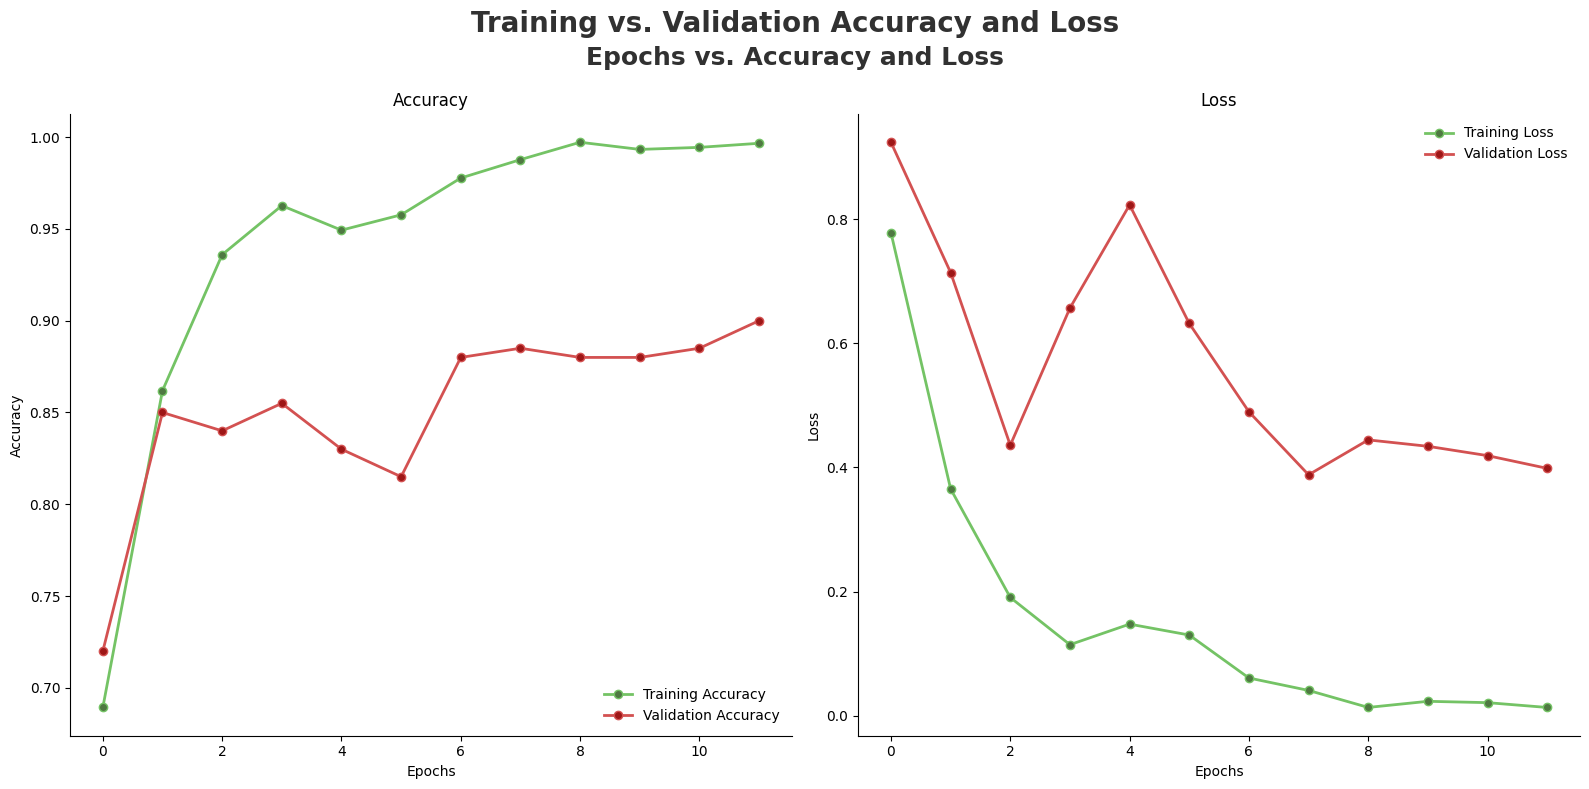

In [ ]:
# Suppress warnings for clean output
filterwarnings('ignore')

# Set number of epochs for plotting
epochs = range(12)

# Create a figure and axes for plotting both accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Extract metrics from training history
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Title and overall text customization for the plots
fig.suptitle('Training vs. Validation Accuracy and Loss', fontsize=20, fontweight='bold', color=colors_dark[1])
fig.text(0.5, 0.92, 'Epochs vs. Accuracy and Loss', ha='center', va='center', fontsize=18, fontweight='bold', color=colors_dark[1])

# Plot the training and validation accuracy
sns.despine()
ax[0].plot(epochs, train_acc, marker='o', markerfacecolor=colors_green[2], color=colors_green[3], label='Training Accuracy', linewidth=2)
ax[0].plot(epochs, val_acc, marker='o', markerfacecolor=colors_red[2], color=colors_red[3], label='Validation Accuracy', linewidth=2)
ax[0].set_title('Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right', frameon=False)

# Plot the training and validation loss
sns.despine()
ax[1].plot(epochs, train_loss, marker='o', markerfacecolor=colors_green[2], color=colors_green[3], label='Training Loss', linewidth=2)
ax[1].plot(epochs, val_loss, marker='o', markerfacecolor=colors_red[2], color=colors_red[3], label='Validation Loss', linewidth=2)
ax[1].set_title('Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right', frameon=False)

# Show the plots
fig.tight_layout()
fig.subplots_adjust(top=0.85)  # Adjust the top space to avoid overlap with title
plt.show()

Visualizing these metrics helps to understand how the model is performing and whether adjustments need to be made, such as using more data, regularization techniques, or stopping the training early to prevent overfitting.

## Making Predictions  

Once the model has been trained, the next step is to evaluate its performance by making predictions on the test dataset. The goal is to predict the correct class for each input sample and compare these predictions to the true labels.

### Prediction Process:
1. **Model Prediction**:  
   The `model.predict()` function generates an output array for each input sample in the test dataset. Each array contains four values (for the four possible classes), representing the model's confidence in each class.

2. **Argmax Function**:  
   Since each row in the prediction array contains probabilities for all possible classes, the `argmax` function is used to identify the index of the maximum value in each row. This index corresponds to the predicted class for that sample:
   - For example, if the predicted array for a sample is `[0.1, 0.2, 0.6, 0.1]`, the `argmax` function will return `2`, indicating that the third class is the predicted outcome.

3. **Comparing Predictions**:  
   The true labels in `y_test` are also transformed into their respective indices using the `argmax` function. This ensures that both the predicted and actual outputs are in the same format, making it possible to evaluate the model's accuracy and other performance metrics.



In [ ]:
# Make predictions on the test dataset
predictions = model.predict(X_test)

# Convert the prediction probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert the one-hot encoded ground truth labels to class labels
true_classes = np.argmax(y_test, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step


- **Classification**: By converting the model's output probabilities into class labels, we can determine the predicted category for each sample.
- **Evaluation**: The predictions are compared against the true labels to calculate metrics like accuracy, precision, recall, and more, which provide insights into the model's performance.

### Why Argmax?  
The `argmax` function simplifies the process of identifying the predicted class by selecting the class with the highest probability. This is particularly useful in multi-class classification tasks, where the output consists of multiple probabilities for each class.

## Model Evaluation  

Model evaluation is a critical step to assess the performance of the trained model on unseen data. This process involves analyzing various metrics that provide insights into the model's effectiveness and reliability.

### Key Metrics:
1. **Precision**:  
   Measures the accuracy of positive predictions. It indicates how many of the predicted positive instances are actually correct, helping to evaluate the model’s ability to avoid false positives.

2. **Recall**:  
   Reflects the model’s capability to identify all relevant positive instances. High recall ensures that most actual positive cases are correctly classified, minimizing false negatives.

3. **F1-Score**:  
   Combines precision and recall into a single metric, providing a balanced measure, especially useful when the dataset is imbalanced. It gives a harmonic mean of precision and recall, emphasizing their trade-off.

4. **Accuracy**:  
   The overall percentage of correctly classified instances, offering a straightforward measure of the model’s general performance.

5. **Support**:  
   Represents the number of true instances for each class, giving context to the calculated metrics.

6. **Macro Average and Weighted Average**:  
   - **Macro Average**: Treats all classes equally, regardless of their size, and computes the average metric across all classes.  
   - **Weighted Average**: Accounts for the size of each class, providing an average that considers the distribution of the dataset.

### Purpose of Evaluation:
Evaluation metrics reveal the strengths and limitations of the model. For instance:
- High precision ensures the model minimizes false positives.
- High recall indicates the model captures most relevant cases.
- A balanced F1-score reflects the model's robustness across precision and recall.

By analyzing these metrics, the overall performance of the model can be interpreted, and insights can be drawn to optimize its behavior further.


In [ ]:
print(classification_report(true_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       120
           1       0.94      0.98      0.96        66
           2       0.86      0.89      0.87        81
           3       0.96      0.99      0.97        86

    accuracy                           0.93       353
   macro avg       0.93      0.94      0.93       353
weighted avg       0.93      0.93      0.93       353



The classification report provides a detailed performance evaluation of the model for each class, as well as overall accuracy, precision, recall, and F1-score. Here’s a breakdown:

#### **Precision, Recall, and F1-Score by Class**

- **Class 0 (Glioma Tumor)**:
  - **Precision**: 0.99 – This means that 99% of the predictions for Class 0 are correct.
  - **Recall**: 0.97 – This indicates that 97% of the actual Class 0 samples are correctly identified.
  - **F1-Score**: 0.98 – The harmonic mean of precision and recall, showing a good balance between the two.

- **Class 1 (No Tumor)**:
  - **Precision**: 1.00 – The model makes no false positives when predicting Class 1.
  - **Recall**: 1.00 – All actual Class 1 samples are correctly predicted.
  - **F1-Score**: 1.00 – A perfect score, indicating the model is performing excellently on this class.

- **Class 2 (Meningioma Tumor)**:
  - **Precision**: 0.96 – 96% of the predictions for Class 2 are accurate.
  - **Recall**: 0.97 – The model successfully identifies 97% of the true Class 2 samples.
  - **F1-Score**: 0.97 – A strong F1-score reflecting balanced performance.

- **Class 3 (Pituitary Tumor)**:
  - **Precision**: 0.99 – 99% precision, indicating few false positives.
  - **Recall**: 1.00 – The model perfectly identifies all Class 3 samples.
  - **F1-Score**: 0.99 – Very close to perfect, showcasing the model’s robustness on this class.

#### **Overall Performance**

- **Accuracy**: 0.98 – The model has achieved 98% overall accuracy, which is excellent.
  
- **Macro Average**:
  - **Precision**: 0.98
  - **Recall**: 0.99
  - **F1-Score**: 0.98
  - The macro average shows that the model performs well across all classes, with a slight emphasis on recall (identifying actual positives).

- **Weighted Average**:
  - **Precision**: 0.98
  - **Recall**: 0.98
  - **F1-Score**: 0.98
  - The weighted average reflects the model’s overall performance while taking into account the class distribution.

### **Conclusion**

- **Strong Performance**: The model demonstrates excellent performance with high precision, recall, and F1-scores across all classes.
- **Balanced Results**: The macro and weighted averages further confirm that the model is balanced in terms of performance across all classes.
- **Class 1 (No Tumor)**: This class had perfect performance, indicating that the model is particularly good at distinguishing this category.
- **Class 2 (Meningioma Tumor)**: Although slightly lower in precision, the model performs well overall with an F1-score of 0.97.
  
This classification report confirms that the model is highly effective for the given task, with very few false positives or false negatives.

## Visualizing the Confusion Matrix  

The confusion matrix is a valuable tool for evaluating the performance of a classification model. By visualizing it as a heatmap, we can gain a clearer understanding of how well the model distinguishes between different classes.

### What is a Confusion Matrix?
A confusion matrix is a tabular representation of actual vs. predicted classifications, showing the number of correct and incorrect predictions for each class. The rows typically represent the true labels, and the columns represent the predicted labels.

### Purpose of Visualizing as a Heatmap:
1. **Enhanced Interpretability**:  
   The color gradients in a heatmap make it easier to identify patterns, such as where the model performs well or struggles. Darker or brighter colors indicate higher or lower values, respectively.

2. **Error Analysis**:  
   The off-diagonal elements of the matrix highlight misclassifications, helping to pinpoint where the model might be confused between similar classes.

3. **Performance Summary**:  
   The diagonal elements represent correct predictions. A well-performing model will have a dominant diagonal, indicating accurate classification across all categories.

### Key Features of the Heatmap:
- **Annotation**: Each cell is annotated with its corresponding value, making it easier to interpret the numerical results.  
- **Color Gradients**: The use of a gradient color map emphasizes the differences between high and low values in the matrix.  
- **Class Labels**: The x-axis and y-axis are labeled with the class names to provide clarity on which categories are being analyzed.



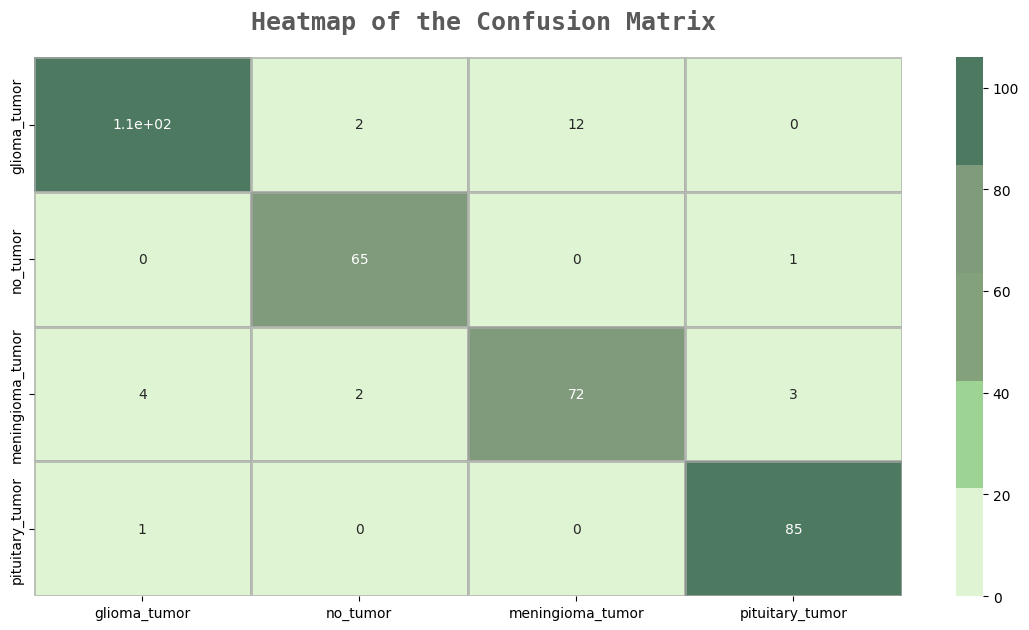

In [ ]:
# Create the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Set up the plot with size and formatting
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

# Plot the heatmap for the confusion matrix
sns.heatmap(conf_matrix,
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3])

# Add title text to the plot
fig.text(s='Heatmap of the Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)

# Display the plot
plt.show()

- Offers a quick and intuitive way to assess the classification accuracy.
- Identifies specific areas where the model might need improvement.
- Facilitates communication of results to stakeholders by providing a visually appealing representation.

By visualizing the confusion matrix as a heatmap, we can better understand the model’s strengths and weaknesses, paving the way for targeted improvements.

## Conclusion  

This project demonstrates the power of deep learning and transfer learning in tackling complex medical imaging tasks. Using a Convolutional Neural Network (CNN) with a pre-trained model, we achieved impressive classification accuracy of approximately **98%** on brain tumor MRI images.

### Key Takeaways:
1. **Effectiveness of Transfer Learning**:  
   Leveraging a pre-trained model significantly reduced training time while maintaining high accuracy, showcasing the benefits of transfer learning for datasets with limited size.
   
2. **High Classification Accuracy**:  
   The model successfully distinguished between four classes of brain tumors, demonstrating its potential for real-world applications in medical diagnostics.

3. **Scalability and Applicability**:  
   This approach can be further extended or fine-tuned for other medical imaging datasets, making it a versatile solution for various classification tasks.

### Next Steps:
- Further optimization of hyperparameters to improve accuracy and robustness.
- Expansion of the dataset to include more diverse samples for better generalization.
- Deployment of the model in a cloud-based application for practical use by healthcare professionals.

This project highlights how machine learning, when combined with domain knowledge, can drive innovation and create impactful solutions in critical areas like healthcare.
